<a href="https://colab.research.google.com/github/Lucas-Buk/Machine-Learning-Metodos-Prob/blob/main/Aula_02_Atualizando_Crenca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

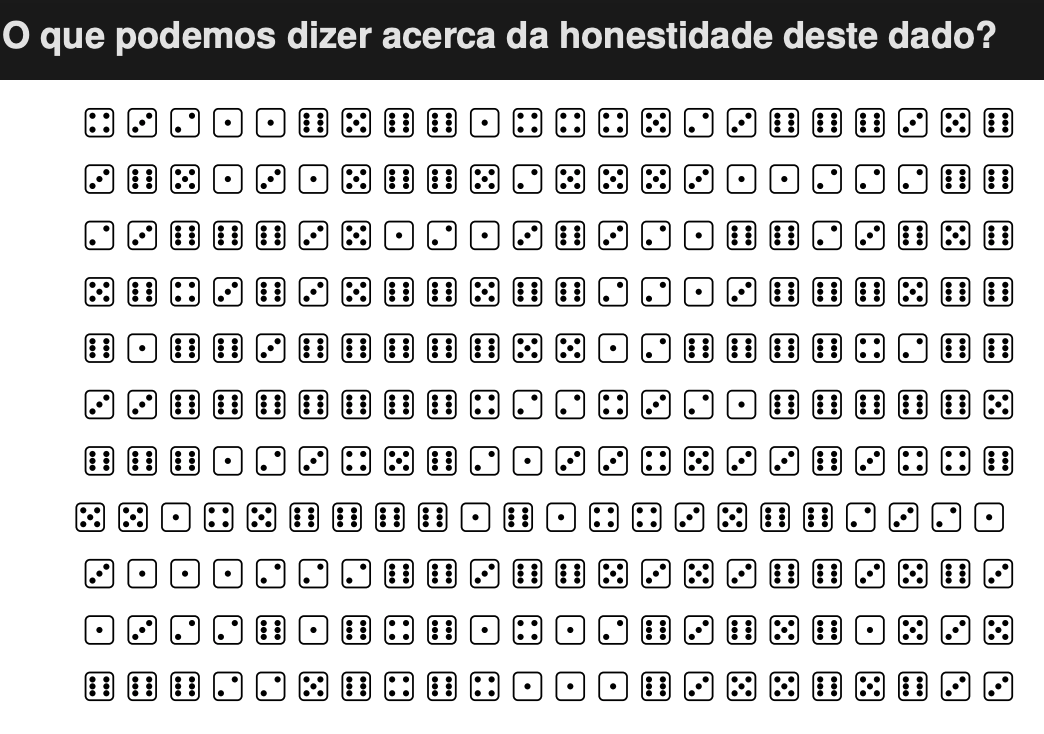

# **Modelando o problema utilizando Bayes**

Podemos utilizar o **teorema de Bayes** para avaliar como cada dado novo atualiza a nossa crença acerca da sequência numérica. Neste sentido vamos modelar o problema, criando uma variável $k$ que pode assumir os valores $\mathbf{PAR}$ e $\mathbf{IMPAR}$ onde desejamos estimar a probabilidade $\theta$.



$P(\theta \vert k) = \frac{p(k \vert \theta) \; p(\theta)}{p(k)}$

Condições: $ k \in \{0,1\} \; e \; \theta \in [0,1].$

1.   Supondo que a probabilidade de termos um número **Par** seja representado por $p(\mathbf{PAR} \vert \theta)$.
2.   Supondo que a probabilidade de termos um número **Ímpar** seja representado por $p(\mathbf{IMPAR} \vert \theta) = 1 - p(\mathbf{PAR} \vert \theta)$.
3. Temos eventos independentes, logo: $p(\mathbf{PAR} \vert \theta) = \theta$ e $p(\mathbf{IMPAR} \vert \theta) = 1 - \theta$. Representando numericamente: $ \mathbf{PAR} = 1$ e $ \mathbf{IMPAR} = 0$.


Para a função de verossimilhança $p(k \vert \theta)$ podemos estabelecer, tendo em vista que trata-se de eventos independentes:

$p(k \vert \theta) = \theta^k (1 - \theta)^{(N-k)}$



## **Definições importantes**



1.   $p(\theta):$ "a priori" --> nossa crença acerca da "honestidade" sem as evidências que desejamos analisar.
2.   $p(\theta \vert k):$ "a posteriori" --> nossa crença atualizada por dados / eventos novos.
3.   $p(k \vert \theta):$ verossimilhança --> uma medida para avaliar o quanto um determinado $\theta$ representa o evento $k$.
4.   $p(k):$ representa uma "medida" dos novos eventos --> evidência.




# **Bibliotecas e instalações**

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

# **Funções**

In [2]:
def moeda(PAR,N,k):
    P = PAR**k*(1-PAR)**(N-k)    
    return P;

In [3]:
# Sequência numérica

dados =  np.array([4,3,2,1,1,6,5,6,6,1,4,4,4,5,2,3,6,6,6,3,5,6,
3,6,5,1,3,1,5,6,6,5,2,5,5,5,3,1,1,2,2,2,6,6,
2,3,6,6,6,3,5,1,2,1,3,6,3,2,1,6,6,2,3,6,5,6,
5,6,4,3,6,3,5,6,6,5,6,6,2,2,1,3,6,6,6,5,6,6,
6,1,6,6,3,6,6,6,6,6,5,5,1,2,6,6,6,6,4,2,6,6,
3,3,6,6,6,6,6,6,6,4,2,2,4,3,2,1,6,6,6,6,6,5,
6,6,6,1,2,3,4,5,6,2,1,3,3,4,5,3,3,6,3,4,4,6,
5,5,1,4,5,6,6,6,6,1,6,1,4,4,3,5,6,6,2,3,2,1,
3,1,1,1,2,2,2,6,6,3,6,6,5,3,5,3,6,6,3,5,6,3,
1,3,2,2,6,1,6,4,6,1,4,1,2,6,3,6,5,6,1,5,3,5,
6,6,6,2,2,5,6,4,6,4,1,1,1,6,3,5,5,6,5,6,3,3])

In [4]:
tendencia = np.cumsum(dados-3.5)

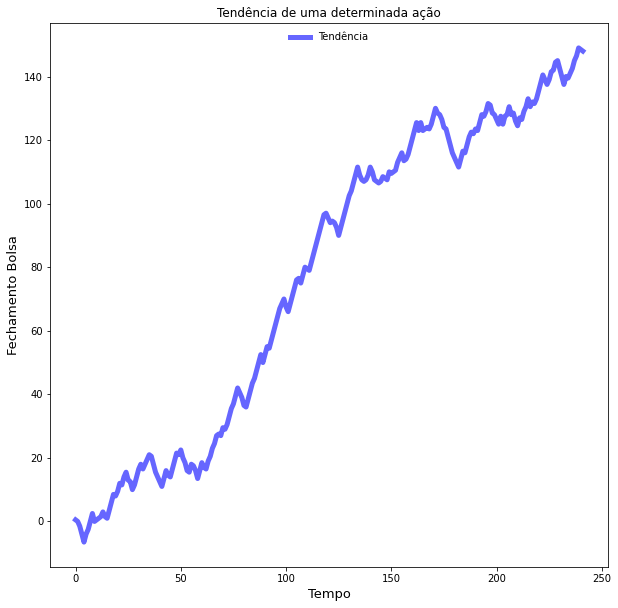

In [5]:
plt.figure(figsize=(10,10))

plt.plot(tendencia, 'b-', lw=5, alpha=0.6, label='Tendência')

plt.xlabel('Tempo', fontsize=13)
plt.ylabel('Fechamento Bolsa', fontsize=13)
plt.title('Tendência de uma determinada ação')
plt.legend(loc='upper center', frameon=False)
plt.show()

## **Crença**: ou ele terá mais números ímpares ou números pares

### $p(\theta):$ "a priori" --> nossa crença acerca da "honestidade" sem as evidências que desejamos analisar.

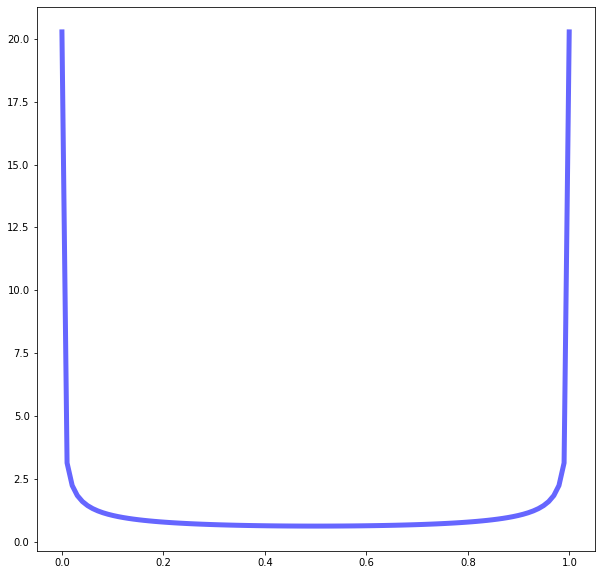

In [7]:
from scipy.stats import beta

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html

a, b = 0.5, 0.5
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

plt.figure(figsize=(10,10))

x1 = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
plt.plot(x1, beta.pdf(x1, a, b),
       'b-', lw=5, alpha=0.6, label='beta pdf')

plt.show()

## **Crença:** ele terá algo em torno de 50% de valores pare e 50% de valores ímpares

### $p(\theta):$ "a priori" --> nossa crença acerca da "honestidade" sem as evidências que desejamos analisar.

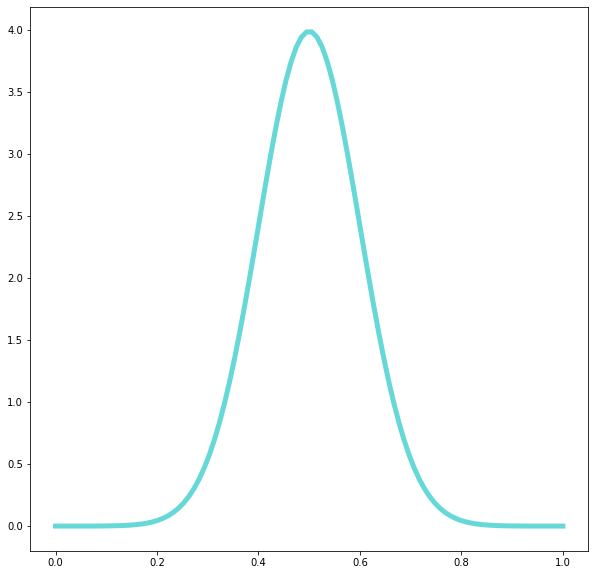

In [8]:
from scipy.stats import norm

mean, var, skew, kurt = norm.stats(moments='mvsk')

plt.figure(figsize=(10,10))

x2 = np.linspace(0,
                1, 100)
plt.plot(x2, norm.pdf(x2,0.5,0.1),
       'c-', lw=5, alpha=0.6, label='norm pdf')

plt.show()

## **Crença:** ele pode assumir qualquer proporção entre pares e ímpares

### $p(\theta):$ "a priori" --> nossa crença acerca da "honestidade" sem as evidências que desejamos analisar.

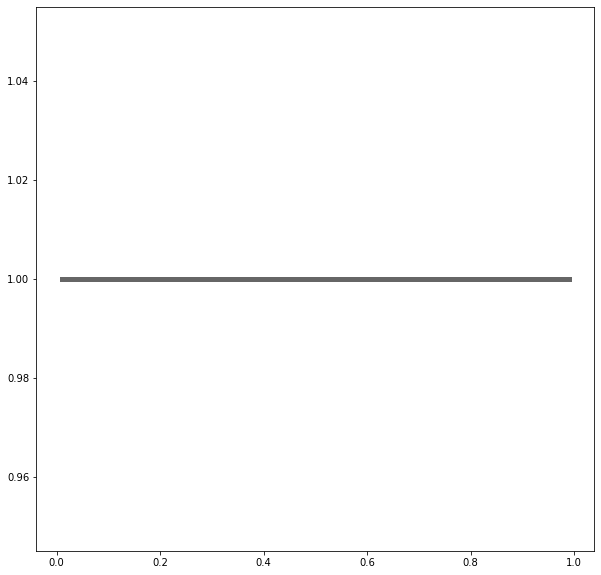

In [9]:
from scipy.stats import uniform

mean, var, skew, kurt = uniform.stats(moments='mvsk')

plt.figure(figsize=(10,10))

x3 = np.linspace(uniform.ppf(0.01),
                uniform.ppf(0.99), 100)
plt.plot(x3, uniform.pdf(x3),
       'k-', lw=5, alpha=0.6, label='norm pdf')

plt.show()

# Atualizando a **Crença**

In [10]:
dados

array([4, 3, 2, 1, 1, 6, 5, 6, 6, 1, 4, 4, 4, 5, 2, 3, 6, 6, 6, 3, 5, 6,
       3, 6, 5, 1, 3, 1, 5, 6, 6, 5, 2, 5, 5, 5, 3, 1, 1, 2, 2, 2, 6, 6,
       2, 3, 6, 6, 6, 3, 5, 1, 2, 1, 3, 6, 3, 2, 1, 6, 6, 2, 3, 6, 5, 6,
       5, 6, 4, 3, 6, 3, 5, 6, 6, 5, 6, 6, 2, 2, 1, 3, 6, 6, 6, 5, 6, 6,
       6, 1, 6, 6, 3, 6, 6, 6, 6, 6, 5, 5, 1, 2, 6, 6, 6, 6, 4, 2, 6, 6,
       3, 3, 6, 6, 6, 6, 6, 6, 6, 4, 2, 2, 4, 3, 2, 1, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 1, 2, 3, 4, 5, 6, 2, 1, 3, 3, 4, 5, 3, 3, 6, 3, 4, 4, 6,
       5, 5, 1, 4, 5, 6, 6, 6, 6, 1, 6, 1, 4, 4, 3, 5, 6, 6, 2, 3, 2, 1,
       3, 1, 1, 1, 2, 2, 2, 6, 6, 3, 6, 6, 5, 3, 5, 3, 6, 6, 3, 5, 6, 3,
       1, 3, 2, 2, 6, 1, 6, 4, 6, 1, 4, 1, 2, 6, 3, 6, 5, 6, 1, 5, 3, 5,
       6, 6, 6, 2, 2, 5, 6, 4, 6, 4, 1, 1, 1, 6, 3, 5, 5, 6, 5, 6, 3, 3])

### 2.   $p(\theta \vert k):$ "a posteriori" --> nossa crença atualizada por dados / eventos novos.


### 3.   $p(k \vert \theta):$ verossimilhança --> uma medida para avaliar o quanto um determinado $\theta$ representa o evento $k$.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Unrecognized location 'right center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


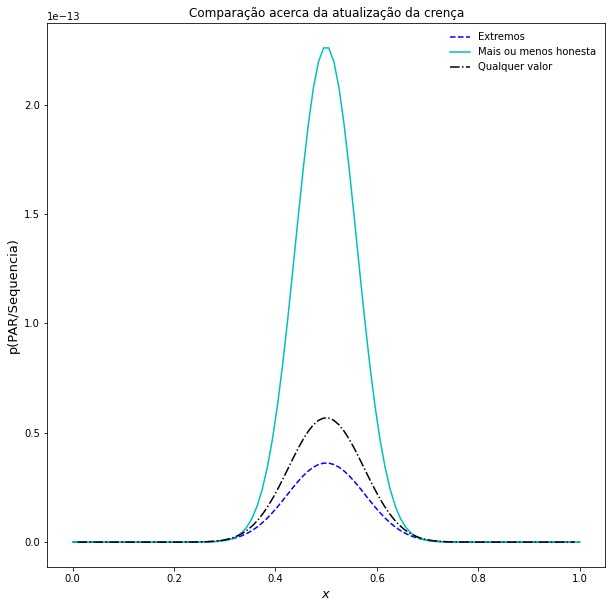

In [14]:
tamanho = len(dados)                        # tamanho da amostra

PAR = np.linspace(0,1,100)                  # probabilidade de ser par

N = 44                                       # número total de dados
k = 22                                       # número de pares

## Numerador de Bayes

y1 = moeda(PAR,N,k)*beta.pdf(x1, a, b)      # p(k/Theta) p(Theta)
y2 = moeda(PAR,N,k)*norm.pdf(x2,0.5,0.1)    # p(k/Theta) p(Theta)
y3 = moeda(PAR,N,k)*uniform.pdf(x3)         # p(k/Theta) p(Theta)

## Observe que p(k) é constante e se torna um fator normalizador

plt.figure(figsize=(10,10))

plt.xlabel('$x$', fontsize=13)
plt.ylabel('p(PAR/Sequencia)', fontsize=13)
plt.title('Comparação acerca da atualização da crença')


plt.plot(x1,y1,'b', linestyle = '--', label = 'Extremos')
plt.plot(x2,y2,'c', linestyle = '-', label = 'Mais ou menos honesta')
plt.plot(x3,y3,'k', linestyle = '-.', label = 'Qualquer valor')
plt.legend(loc='right center', frameon=False)

  #axes = plt.gca()
  #xmin = 0
  #xmax = 1
  #axes.set_xlim([xmin,xmax])
  # axes.set_ylim([0,0.7])

plt.show()

# **Referências**

https://www.quantstart.com/articles/Bayesian-Inference-of-a-Binomial-Proportion-The-Analytical-Approach/